# 2. Topic modelling

## Setup

In [1]:
%run __init__.py

In [2]:
import pandas as pd
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/home/alejandro/.envs/edma/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
RANDOM_SEED=42

## Loading the dataframe

In [4]:
GIT_FILE_PATH = os.path.join(NOTEBOOK_1_RESULTS_DIR, 'git_dataframe.pkl')

git_df = pd.read_pickle(GIT_FILE_PATH)

## Preprocessing text

In [5]:
git_repositories = git_df['full_text_cleaned'].values

In [6]:
MAX_CHAR_LENGTH = 100000

git_repositories = [r[:MAX_CHAR_LENGTH] for r in git_repositories]

In [7]:
import en_core_sci_lg

from herc_common.text import TextPreprocessor


custom_stop_words = {"merge", "branch", "master", "refs", "svn",
                     "branch", "pull", "request", "fix", "ref",
                     "error", "add", "file", "bug", "class", "return",
                     "string"}

git_preprocessor = TextPreprocessor(en_core_sci_lg, custom_stop_words)
preprocessed_texts = git_preprocessor.fit_transform(git_repositories)

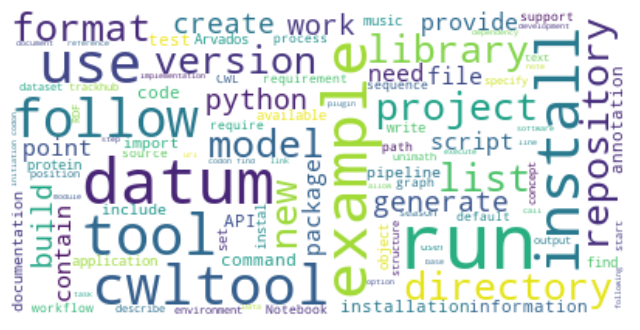

In [8]:
from herc_common.text import plot_word_cloud

complete_text = ' '.join([' '.join(token) for token in preprocessed_texts])

plot_word_cloud(complete_text)

## LDA

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

def dummy(doc):
    return doc


tf_vectorizer = CountVectorizer(preprocessor=dummy, tokenizer=dummy, ngram_range=(1, 2))
dtm_tf = tf_vectorizer.fit_transform(preprocessed_texts)

In [10]:
from sklearn.decomposition import LatentDirichletAllocation

from herc_common.topic_modeling import base_scoring_function, compute_model_results


lda_scoring_func = lambda clf, X: base_scoring_function(vectorizer=tf_vectorizer,
                                        texts=preprocessed_texts, model=clf, X=X)


lda_results = compute_model_results(LatentDirichletAllocation, dtm_tf,
                                    lda_scoring_func, seed=RANDOM_SEED,
                                    min_topics=15, max_topics=70, max_iter=100)
lda_results

/home/alejandro/.envs/edma/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


{LatentDirichletAllocation(max_iter=100, n_components=15, random_state=42): -4.553641796939967,
 LatentDirichletAllocation(max_iter=100, n_components=16, random_state=42): -4.294328711705459,
 LatentDirichletAllocation(max_iter=100, n_components=17, random_state=42): -3.965245938897195,
 LatentDirichletAllocation(max_iter=100, n_components=18, random_state=42): -6.382507060602509,
 LatentDirichletAllocation(max_iter=100, n_components=19, random_state=42): -4.130120280165372,
 LatentDirichletAllocation(max_iter=100, n_components=20, random_state=42): -4.864124087807246,
 LatentDirichletAllocation(max_iter=100, n_components=21, random_state=42): -5.336414760585465,
 LatentDirichletAllocation(max_iter=100, n_components=22, random_state=42): -3.517186167474179,
 LatentDirichletAllocation(max_iter=100, n_components=23, random_state=42): -6.870763234983472,
 LatentDirichletAllocation(max_iter=100, n_components=24, random_state=42): -7.844316699597548,
 LatentDirichletAllocation(max_iter=100,

In [11]:
from herc_common.topic_modeling import get_best_model, print_results_info

print_results_info(lda_results)
best_lda_model = get_best_model(lda_results)

Best model parameters: {'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 100, 'mean_change_tol': 0.001, 'n_components': 22, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': 42, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}
Topic coherence: -3.517186167474179


In [12]:
from herc_common.topic_modeling import print_top_words

tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(best_lda_model, tf_feature_names, 10)

Topic #0: season Arvados unimath point datum Notebook development script new notebook
Topic #1: directory sentence Wasserstein model generate dataset generation space latent space latent
Topic #2: cwltool package tool run workflow graph test CWL job object
Topic #3: pogo import sentence library pogoentry list public unique repository entry
Topic #4: match contain ontology triple entity class wikidata match ontology line command line
Topic #5: útile para design proteome design maintain design integrate design description reference description project description logic description local description etc
Topic #6: concept format check example tbox subsumption expansion abox run axiom
Topic #7: codon position find codon find transcript initiation initiation codon variation frame reading
Topic #8: mmtf include build run need cmake library code load file
Topic #9: termite docstore import specify texpress list pprint library entity example
Topic #10: encode contain decode Huffman Table Table H

In [13]:
pyLDAvis.sklearn.prepare(best_lda_model, dtm_tf, tf_vectorizer, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
2     -26.692720 -27.704954       1        1  19.257305
0      13.787896  17.627989       2        1  11.155430
16    -43.363312 -10.139513       3        1  10.712920
14     37.804443  26.228256       4        1   8.576072
7      -2.641228 -25.453217       5        1   7.042598
11     25.433702 -25.086269       6        1   5.458838
17      9.526117 -47.739101       7        1   4.890855
6     -63.803055   8.889803       8        1   4.479560
3     -26.882816  32.929134       9        1   4.229097
8      18.922201  48.235912      10        1   4.205905
15     -2.837339  35.096283      11        1   3.703435
1     -10.915092  13.659663      12        1   3.094979
13     34.234432  -1.135993      13        1   3.011074
9     -19.314470 -51.895966      14        1   2.008049
18      6.638647  -4.402594      15        1   1.768639
10    -38.965889  55.317245      16        1   1.685232
19    -18.696774  -6.221048      17        1   1.147643
21    -54.938713  32.786816      18        1   1.075990
12    -67.532593 -18.321384      19        1   0.980954
20    -48.675068 -40.475040      20        1   0.908936
4     -10.248114  59.334454      21        1   0.593408
5     -36.254284  11.895074      22        1   0.013080, topic_info=                       Term       Freq      Total Category  logprob  loglift
2851                cwltool  45.000000  45.000000  Default  30.0000  30.0000
2312                  codon  23.000000  23.000000  Default  29.0000  29.0000
8688               trackhub  25.000000  25.000000  Default  28.0000  28.0000
7437                    run  84.000000  84.000000  Default  27.0000  27.0000
2487                concept  18.000000  18.000000  Default  26.0000  26.0000
...                     ...        ...        ...      ...      ...      ...
3177   detail documentation   0.000231   1.333053  Topic22  -9.1568   0.2817
3176         detail concept   0.000231   1.156926  Topic22  -9.1568   0.4234
3175          detail Tobias   0.000231   1.142441  Topic22  -9.1568   0.4360
3174                 detail   0.000231   3.550495  Topic22  -9.1568  -0.6979
3173  destructive operation   0.000231   1.403292  Topic22  -9.1568   0.2303

[1491 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
2         9  0.997848                AIDA
4         9  0.838530       AIDA sentence
5         8  0.978980                ALCQ
9         1  0.177916                 API
9         2  0.088958                 API
...     ...       ...                 ...
9440     16  0.261993                yaml
9441     15  0.747825  yaml configuration
9449      1  0.811018               yield
9473     13  0.935644                éste
9478     13  0.943468          útile para

[1793 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 17, 15, 8, 12, 18, 7, 4, 9, 16, 2, 14, 10, 19, 11, 20, 22, 13, 21, 5, 6])

# LSA

In [24]:
from sklearn.decomposition import TruncatedSVD

lsa_scoring_func = lda_scoring_func

lsa_results = compute_model_results(TruncatedSVD, dtm_tf, lsa_scoring_func, 
                                    seed=RANDOM_SEED, min_topics=5,
                                    max_topics=50)
lsa_results

{TruncatedSVD(n_components=5, random_state=42): -2.703474860839518,
 TruncatedSVD(n_components=6, random_state=42): -2.4436631337042223,
 TruncatedSVD(n_components=7, random_state=42): -2.9303626637140283,
 TruncatedSVD(n_components=8, random_state=42): -3.2812138528016312,
 TruncatedSVD(n_components=9, random_state=42): -3.5840533714895346,
 TruncatedSVD(n_components=10, random_state=42): -3.5531983061302164,
 TruncatedSVD(n_components=11, random_state=42): -3.303543053615515,
 TruncatedSVD(n_components=12, random_state=42): -3.0983343528805265,
 TruncatedSVD(n_components=13, random_state=42): -2.8958818691443233,
 TruncatedSVD(n_components=14, random_state=42): -2.9191770272920476,
 TruncatedSVD(n_components=15, random_state=42): -2.743443650928028,
 TruncatedSVD(n_components=16, random_state=42): -2.5898618988846263,
 TruncatedSVD(n_components=17, random_state=42): -2.4660876269028,
 TruncatedSVD(n_components=18, random_state=42): -2.7508039219663254,
 TruncatedSVD(n_components=19, 

## NMF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(preprocessor=dummy, tokenizer=dummy, ngram_range=(1, 2))
dtm_tfidf = tfidf_vectorizer.fit_transform(preprocessed_texts)

In [27]:
from sklearn.decomposition import NMF

nmf_scoring_func = lambda clf, X: base_scoring_function(vectorizer=tfidf_vectorizer,
                                                        texts=preprocessed_texts, model=clf, X=X)

nmf_results = compute_model_results(NMF, dtm_tfidf, nmf_scoring_func, 
                                    seed=RANDOM_SEED, min_topics=5,
                                    max_topics=60, max_iter=700)
nmf_results

/home/alejandro/.envs/edma/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 700 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/home/alejandro/.envs/edma/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 700 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


{NMF(max_iter=700, n_components=5, random_state=42): -8.529655526478141,
 NMF(max_iter=700, n_components=6, random_state=42): -8.161866436849124,
 NMF(max_iter=700, n_components=7, random_state=42): -8.523391072072581,
 NMF(max_iter=700, n_components=8, random_state=42): -7.781189369522497,
 NMF(max_iter=700, n_components=9, random_state=42): -8.078098176521912,
 NMF(max_iter=700, n_components=10, random_state=42): -8.455760104844556,
 NMF(max_iter=700, n_components=11, random_state=42): -8.543809325984606,
 NMF(max_iter=700, n_components=12, random_state=42): -8.227849236324603,
 NMF(max_iter=700, n_components=13, random_state=42): -8.889099074815245,
 NMF(max_iter=700, n_components=14, random_state=42): -7.942709789084459,
 NMF(max_iter=700, n_components=15, random_state=42): -8.465891473999188,
 NMF(max_iter=700, n_components=16, random_state=42): -8.202792738923897,
 NMF(max_iter=700, n_components=17, random_state=42): -7.274931502102787,
 NMF(max_iter=700, n_components=18, random_

In [28]:
print_results_info(nmf_results)
best_nmf_model = get_best_model(nmf_results)

Best model parameters: {'alpha': 0.0, 'beta_loss': 'frobenius', 'init': None, 'l1_ratio': 0.0, 'max_iter': 700, 'n_components': 58, 'random_state': 42, 'shuffle': False, 'solver': 'cd', 'tol': 0.0001, 'verbose': 0}
Topic coherence: -1.4400459550056366


In [29]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(best_nmf_model, tfidf_feature_names, 10)

Topic #0: run test install cwltool version source specify implementation requirement tox
Topic #1: tbox concept info abox definition subsumption tbox definition format expand tbox gci
Topic #2: unimath mathematic coq Voevodsky Ahrens Grayson Vladimir Daniel unimath library Benedikt
Topic #3: pogo import pogoentry library unique list clusteredpsmreport public entry tab
Topic #4: mmtf cmake load mmtf ninja MMTF include load argc doxygen int argc
Topic #5: season Notebook point player comparison game NBA shooter chart notebook
Topic #6: annotation protein structure map contribution sequence datum position sequence annotation annotation structural
Topic #7: menu catalog fdp dialog fill FAIR dropdown menu dropdown metadata new
Topic #8: codon position codon find initiation codon initiation transcript reading frame reading wild variation
Topic #9: MKL version library install sudo mpcc optimize repository code Intel
Topic #10: run test code installation server Python version install Science s